In [2]:
#1:Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
#2:Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
#3:First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

customer_df.head()




,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
rows, columns = customer_df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9134
Number of columns: 24


In [13]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [45]:
#4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
#customer_df.columns = customer_df.columns.str.lower()  # Convert column names to lowercase
#customer_df.columns = customer_df.columns.str.replace(' ', '_') 

In [47]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [48]:
#5 Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [46]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [51]:
#6Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions. 
numerical_df = customer_df.select_dtypes(include='number')



In [55]:
#Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df.
# Filtering continuous variables
continuous_df = customer_df.select_dtypes(include='number')

# Filtering discrete variables
discrete_df = customer_df.select_dtypes(exclude='number')

In [60]:
#9 Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

def plot_discrete_variables(customer_df):
    discrete_variables = df.select_dtypes(include='int64').columns  # Assuming int64 dtype for discrete variables
    for var in discrete_variables:
        sns.countplot(x=var, data=df)
        plt.title(f'Countplot of {var}')
        plt.show()

In [61]:
#Comment what you can see in the plots: Nothing

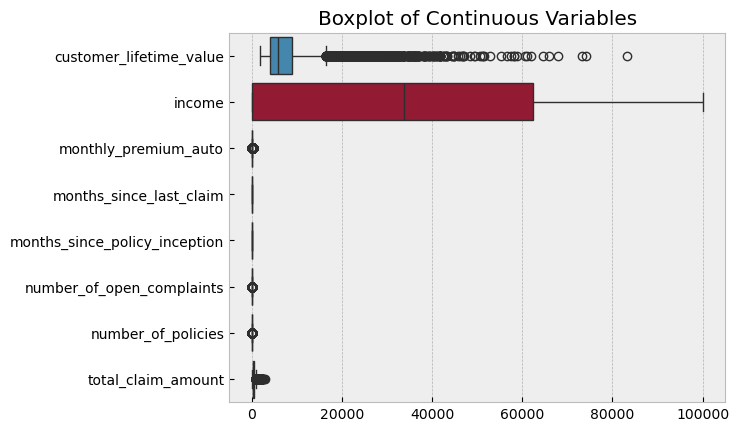

In [62]:
#Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!) # Assuming continuous_variables contains the list of continuous variable names


# Assuming numerical_df contains the continuous variables
# Replace 'numerical_df' with the actual DataFrame containing the continuous variables
sns.boxplot(data=numerical_df, orient="h")
plt.title('Boxplot of Continuous Variables')
plt.show()

In [67]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

# Assuming 'numerical_df' is the DataFrame including the continuous variables
# Suppose 'column_to_clean' is the column containing potential outliers

# Calculating the 25th and 75th percentiles
Q1 = numerical_df['customer_lifetime_value'].quantile(0.25)
Q3 = numerical_df['monthly_premium_auto'].quantile(0.75)

# Calculating the interquartile range
IQR = Q3 - Q1

# Determining the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers from the main dataframe
cleaned_df = numerical_df[(numerical_df['customer_lifetime_value'] > lower_bound) & (numerical_df['monthly_premium_auto'] < upper_bound)]

In [68]:
numerical.to_csv('numerical_cleaned.csv', index=False)

NameError: name 'categorical' is not defined